In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import math 
import networkx.algorithms.community as nxcom
#pip install networkx==2.4

In [2]:
g=nx.karate_club_graph()

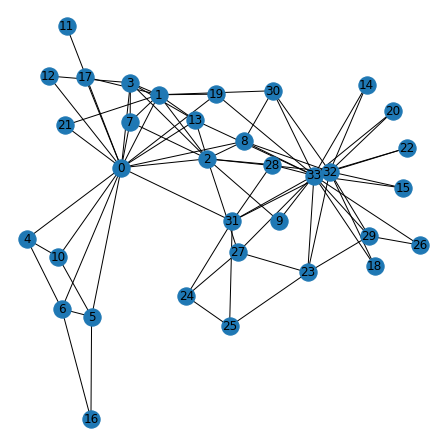

In [3]:
plt.figure(1,figsize=(6,6)) 
pos=nx.spring_layout(g)
nx.draw(g,pos,with_labels=True)
plt.show()

# Girvan-Newman method

In [4]:
from networkx.algorithms.community.centrality import girvan_newman
communities=girvan_newman(g)
communities=tuple(sorted(c) for c in next(communities))

In [5]:
#return a list indicating which nodes belongs to which community
list(communities)

[[0, 1, 3, 4, 5, 6, 7, 10, 11, 12, 13, 16, 17, 19, 21],
 [2, 8, 9, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]]

In [6]:
# The methods simply assign the community number to the nodes and edges:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b) 

In [7]:
#With this we now assign the community info to the elements:
# Set node and edge communities
set_node_community(g, communities)
set_edge_community(g)

node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]

# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

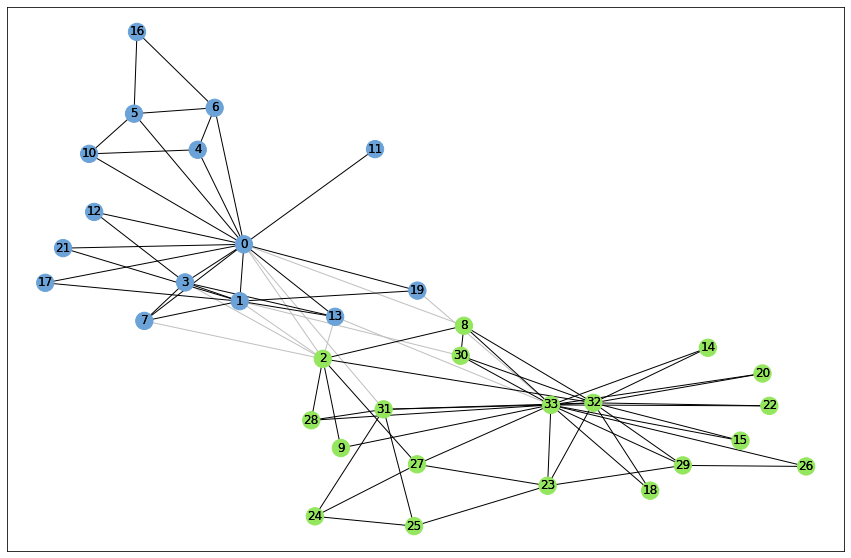

In [8]:
#plotting
karate_pos = nx.spring_layout(g)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
nx.draw_networkx(g, pos=karate_pos, node_size=0, edgelist=external,edge_color="silver")
# Draw nodes and internal edges
nx.draw_networkx(g, pos=karate_pos, node_color=node_color,edgelist=internal,edge_color=internal_color)
plt.show()

# Greedy Algorithm

In [9]:
communities=sorted(nxcom.greedy_modularity_communities(g))

In [10]:
#return a list indicating which nodes belongs to which community
community_list=[]
for i in range (0,len(communities)):
    community_list.append(list(communities[i]))
community_list

[[32, 33, 8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31],
 [1, 2, 3, 7, 9, 12, 13, 17, 21],
 [0, 4, 5, 6, 10, 11, 16, 19]]

In [11]:
# The methods simply assign the community number to the nodes and edges:
def set_node_community(G, communities):
    '''Add community to node attributes'''
    for c, v_c in enumerate(communities):
        for v in v_c:
            # Add 1 to save 0 for external edges
            G.nodes[v]['community'] = c + 1

def set_edge_community(G):
    '''Find internal edges and add their community to their attributes'''
    for v, w, in G.edges:
        if G.nodes[v]['community'] == G.nodes[w]['community']:
            # Internal edge, mark with community
            G.edges[v, w]['community'] = G.nodes[v]['community']
        else:
            # External edge, mark as 0
            G.edges[v, w]['community'] = 0

def get_color(i, r_off=1, g_off=1, b_off=1):
    '''Assign a color to a vertex.'''
    r0, g0, b0 = 0, 0, 0
    n = 16
    low, high = 0.1, 0.9
    span = high - low
    r = low + span * (((i + r_off) * 3) % n) / (n - 1)
    g = low + span * (((i + g_off) * 5) % n) / (n - 1)
    b = low + span * (((i + b_off) * 7) % n) / (n - 1)
    return (r, g, b) 

In [12]:
#With this we now assign the community info to the elements:
# Set node and edge communities
set_node_community(g, communities)
set_edge_community(g)

node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]

# Set community color for edges between members of the same community (internal) and intra-community edges (external)
external = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] == 0]
internal = [(v, w) for v, w in g.edges if g.edges[v, w]['community'] > 0]
internal_color = ['black' for e in internal]

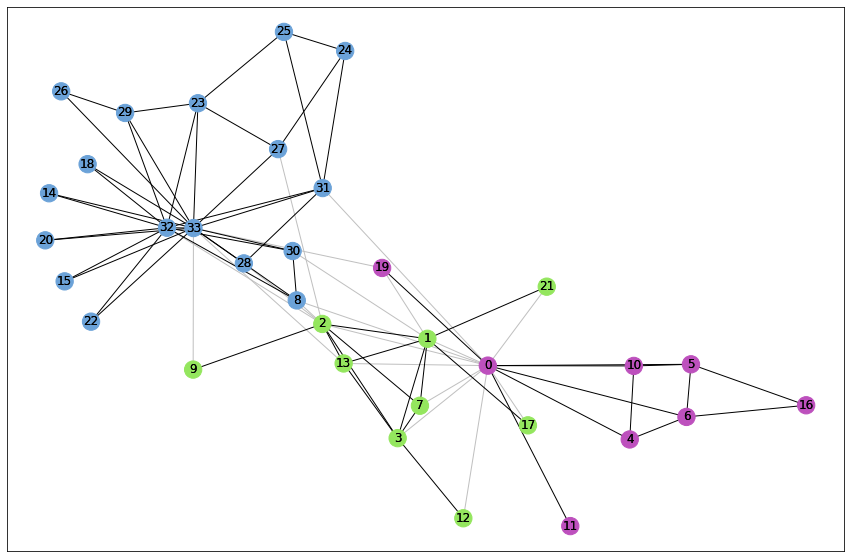

In [13]:
#plotting
karate_pos = nx.spring_layout(g)
plt.rcParams.update({'figure.figsize': (15, 10)})
# Draw external edges
nx.draw_networkx(g, pos=karate_pos, node_size=0, edgelist=external,edge_color="silver")
# Draw nodes and internal edges
nx.draw_networkx(g, pos=karate_pos, node_color=node_color,edgelist=internal,edge_color=internal_color)
plt.show()

# Ravasz algorithm

In [14]:
from scipy.spatial import distance
from scipy.cluster import hierarchy
from collections import defaultdict
t=1.15
labels=g.nodes()    # keep node labels
path_length=nx.all_pairs_shortest_path_length(g)
distances=np.zeros((len(g),len(g)))
temp=list(path_length)
for i in range(0,len(temp)):
    for v,d in temp[i][1].items():
        distances[temp[i][0]][v] = d
        distances[v][temp[i][0]] = d
        if temp[i][0]==v: distances[temp[i][0]][temp[i][0]]=0
Y=distance.squareform(distances)
Z=hierarchy.average(Y)
membership=list(hierarchy.fcluster(Z,t=t))
partition={}
for i in range(len(membership)):
    partition[i]=membership[i]

In [15]:
partition

{0: 4,
 1: 4,
 2: 4,
 3: 4,
 4: 1,
 5: 2,
 6: 1,
 7: 4,
 8: 5,
 9: 5,
 10: 2,
 11: 4,
 12: 4,
 13: 5,
 14: 5,
 15: 5,
 16: 3,
 17: 4,
 18: 5,
 19: 5,
 20: 5,
 21: 4,
 22: 5,
 23: 5,
 24: 5,
 25: 5,
 26: 5,
 27: 5,
 28: 5,
 29: 5,
 30: 5,
 31: 5,
 32: 5,
 33: 5}

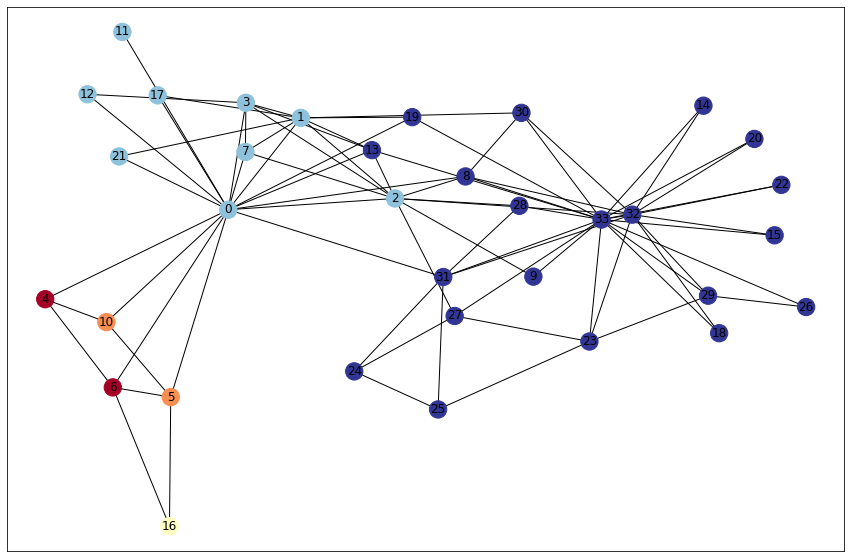

In [16]:
#plotting
karate_pos = nx.spring_layout(g)
plt.rcParams.update({'figure.figsize': (15, 10)})
nx.draw_networkx(g,pos,nodelist=list(partition.keys()),cmap=plt.cm.RdYlBu, node_color=list(partition.values()))
plt.show()

# Stochastic block models

In [17]:
sizes = [10, 10, 10]
probs = [[0.9, 0.1, 0], [0.1, 0.8, 0.1], [0, 0.1, 0.9]]
g=nx.stochastic_block_model(sizes, probs, seed=0)
g

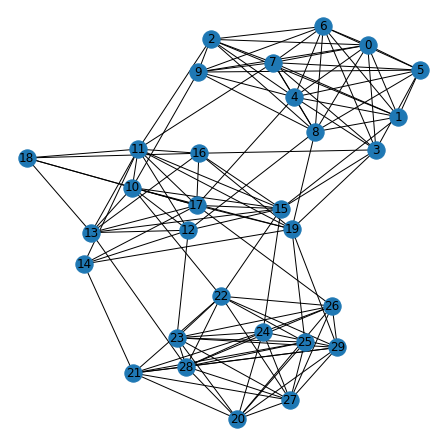

In [18]:
plt.figure(1,figsize=(6,6)) 
pos=nx.kamada_kawai_layout(g)
nx.draw(g,pos,with_labels=True)
plt.show()

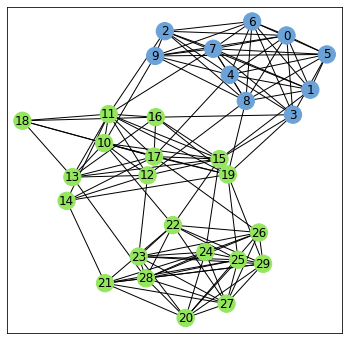

In [19]:
#Girvan-Newman method
communities=girvan_newman(g)
communities=tuple(sorted(c) for c in next(communities))
set_node_community(g, communities)
node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]
plt.figure(1,figsize=(6,6)) 
pos=nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos, node_color=node_color)

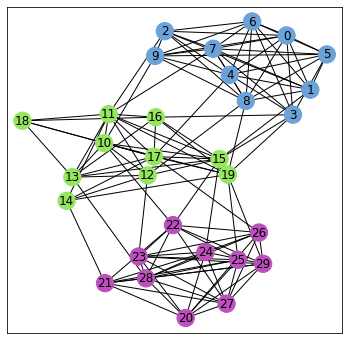

In [20]:
#Greedy algorithm
communities=sorted(nxcom.greedy_modularity_communities(g))
set_node_community(g, communities)
node_color = [get_color(g.nodes[v]['community']) for v in g.nodes]
plt.figure(1,figsize=(6,6)) 
pos=nx.kamada_kawai_layout(g)
nx.draw_networkx(g, pos, node_color=node_color)

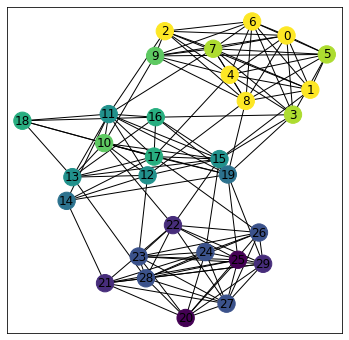

In [21]:
#Ravasz algorithm
t=0.6
labels=g.nodes()    # keep node labels
path_length=nx.all_pairs_shortest_path_length(g)
distances=np.zeros((len(g),len(g)))
temp=list(path_length)
for i in range(0,len(temp)):
    for v,d in temp[i][1].items():
        distances[temp[i][0]][v] = d
        distances[v][temp[i][0]] = d
        if temp[i][0]==v: distances[temp[i][0]][temp[i][0]]=0
Y=distance.squareform(distances)
Z=hierarchy.average(Y)
membership=list(hierarchy.fcluster(Z,t=t))
partition={}
for i in range(len(membership)):
    partition[i]=membership[i]
karate_pos = nx.spring_layout(g)
plt.figure(1,figsize=(6,6)) 
nx.draw_networkx(g,pos,nodelist=list(partition.keys()), node_color=list(partition.values()))
plt.show()

# Core-periphery Detection Algorithms

In [22]:
#pip install cpnet
import cpnet

In [23]:
g=nx.karate_club_graph()

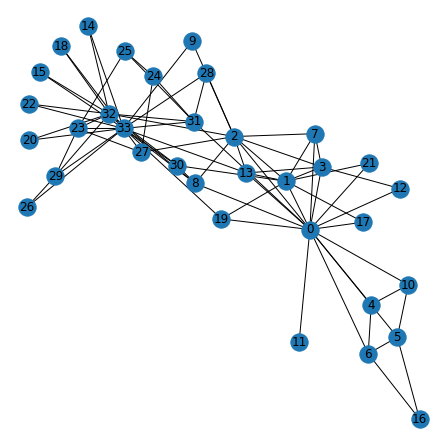

In [24]:
plt.figure(1,figsize=(6,6)) 
pos=nx.spring_layout(g)
nx.draw(g,pos,with_labels=True)
plt.show()

In [25]:
#Load an algorithm for detecting core-periphery structure in networks
algorithm=cpnet.KM_config()
algorithm.detect(g)
#c are integers indicating group ids
#x[i]=1 or =0 indicating that node i belongs to a core or a periphery
c=algorithm.get_pair_id()
x=algorithm.get_coreness()

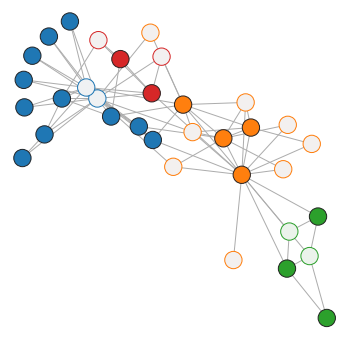

In [26]:
fig = plt.figure(figsize=(6, 6))
ax = plt.gca()
ax, pos = cpnet.draw(g, c, x, ax, pos=pos)